# **Dive into Machine Learning: Learning by Implementing**

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/introduction-to-machine-learning.png" width="60%" />

*Before you start*

Use this link to access the practical and save a copy.

<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2023/blob/5-feat-introduction-to-ml-practical/practicals/Intro_ML_English_Prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> [Change colab link to point to prac.]

© Deep Learning Indaba 2023. Apache License 2.0.

**Authors:**

**Reviewers:**

**Introduction:**

Dans ce tutoriel, nous explorerons les fondamentaux du machine learning. Nous allons apprendre comment creer et entrainer un classeur d'apprentissage automatique. Nous allons nous familiariser avec les concept sur la function cout et son optimization.

**Topics:**

Sujets: Apprentissage Supervisé, Reseaux des Neurones, Calcul Numerique.

Level: <font color='grey'>`Debutant`


**Objectifs::**

- Comprendre les base des l'apprentissage machine(automatique)
- Entrainer une modele de regression lineaire 
- Entrainer une reseau de neuronnes pour la classification a plusiers classes.

**Prerequisites:**

- Familiarity with [Numpy](https://numpy.org/doc/stable/user/quickstart.html).

**Outline:**

>[Hands-on Introduction to Machine Learning](#scrollTo=m2s4kN_QPQVe)

>>[What is machine learning](#scrollTo=FVw9C8GugkAj)

>>>[1.1 Types of machine learning problems - Beginner](#scrollTo=v2k8dcYR9Hvb)

>>>[1.2 Data - Beginner](#scrollTo=1KK-dbRw730T)

>>[Regression](#scrollTo=e9NW58_3hAg2)

>>>[2.1 Linear regression - Beginner](#scrollTo=bA_2coZvhAg3)

>>>>[Loss function and optimization - Beginner](#scrollTo=hNJgESq_LP4R)

>>>>[Training the model using Jax - Beginner](#scrollTo=q9dQh9DdLYPE)

>>>[2.2 Non linear regression and neural networks  - Beginner](#scrollTo=BKtMEnRkhAg9)

>>>>[Model representation - Beginner](#scrollTo=XStsgHB2MarI)

>>>>[Activation functions - Beginner](#scrollTo=fkpytbBzMvMj)

>>>>[Building a simple neural network model with Jax - Beginner](#scrollTo=3Wrxt2orM7sk)

>>[Classification](#scrollTo=fbTsk0MdhAhC)

>>>[3.1 Logistic regression - Beginner](#scrollTo=wMgxJU0TOX6O)

>>>>[Logits and sigmoid activation function - Beginner](#scrollTo=SE1L3rmaO4UP)

>>>>[Extending to Multi-class classification](#scrollTo=HjQNjDC2cG2t)

>>>>[Building a simple neural network for classification - Beginner](#scrollTo=EcXXE56hPOhK)

>>>>[Training the model - Beginner](#scrollTo=GcSvlekHPWxW)

>>>>[Evaluating the model - Beginner](#scrollTo=sGPvmGWkP1fT)

>>[Conclusion](#scrollTo=fV3YG7QOZD-B)

>>>[Appendix](#scrollTo=742JhcnAxTof)

>>>[Basis of JAX [OPTIONAL] - Beginner](#scrollTo=742JhcnAxTof)

>>>>[JAX and NumPy - Differences ❌](#scrollTo=etSsvtmQz9L9)

>>>>[JAX arrays are immutable, while NumPy arrays are not.](#scrollTo=mgu5mHNZ1Esn)

>>>>[Randomness in NumPy vs JAX](#scrollTo=Ik_8oN9m1_zS)

>>>>>[In Numpy, PRNG is based on a global state.](#scrollTo=jaWE-uiW2G4p)

>>>>>[In JAX, PRNG is explicit.](#scrollTo=eNQW9JwK4Yp6)

>>>[Derivation of partial derivatives for exercise 2 [OPTIONAL]](#scrollTo=kh_8f4gKyufu)

>>>[Intuition for multi-class CE loss: exercise 3 [OPTIONAL]](#scrollTo=fRYbQvz01Zlm)

>>[Feedback](#scrollTo=o1ndpYE50BpG)


In [1]:
## Install and import anything required. Capture hides the output from the cell.
# @title Install and import required packages. (Run Cell)
!pip install -q clu

import jax
import jax.numpy as jnp
import flax
import flax.linen as nn
from typing import NamedTuple, Any, Dict

import matplotlib.pyplot as plt
import numpy as np

from clu import parameter_overview

from sklearn.datasets import fetch_openml


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# **Qu'est-ce que l'apprentissage automatique (Machine Learning)**

Dans les deux decenies passes, le domaine de l'intelliegnce artificielle a evoluer d'un domaine utilisé uniquement par les informaticiens, mathematiciens, et physiciens  à un domaine appliqué dans tous domaine. C'est actuellement utiliser par tous humain d'un domaine a un autre. Les appications comme youtube et netflix que nous utilisons au jour le jour utilize l'IA pour suggerer le contenue que nous pouvons aimer.
<center>
<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/AIvsML.png" width="80%"/>
</center>

L'IA c'est une science qui a pour objectif le development des systemes intelligent. **L'apprentissage automatique** est un sous ensemble de l'IA qui apprend des données en utilisant les techiques de la modellisation statitstiques. **L'apprentissage profond ou deep learning** c'est un sous ensenmble de l'apprentissage machine qui utilise les reseaux des neurones artificielles pour la modelisations.

### 1.1 Types des problemes d'appentissage automatique.- <font color='blue'>`Beginner`</font>

L'apprentissage automatique se base sur l'apprentissage sur le données.  Lors de la formulation d'un probleme d'apprentissage automatique, la premiere question a se posee est de savoir quel type de tache nous avons. En general les taches du machine learning peuvent etre diviser en 3 categories.

<center>
<img src="https://www.researchgate.net/publication/354960266/figure/fig1/AS:1075175843983363@1633353305883/The-main-types-of-machine-learning-Main-approaches-include-classification-and.png" width="80%" />
</center>

<font color='red'>Apprentissage non supervisee: </font>: Dans l'apprentissage non supervise, nour avons des données non labelisée et l'objectif est de trouvers des patterns, structures ou relations entre les. donees sans explicit guidance. L'agorithm essayes de grouper les donnes smiliares et reduire leur dimension pour trouver les structures cachés.

<font color='red'>Unsupervised Learning</font>: In unsupervised learning, the algorithm is given an unlabeled dataset, and the goal is to find patterns, structures, or relationships within the data without labels. The algorithm tries to group similar data points or reduce the dimensionality of the data to reveal underlying structures.

<font color='red'>Reinforcement learning:</font>: Dans le reinforcement learning , l'argorithm apprend a prendre des decision grace a son interaction avec un environment. L'apprenant, (agent ) recoit un feedback comme un rewards(encouragement ) ou penalite en function des ses actions. Ensuite il apprend a maximiser le cummalitaive reward au cour du temp.

**Exercise 1.1**: Pour chaque tache suivante, identifier a quelle categorie elle appartient.
  -  Apprendre un robot a marcher.
  -  Prediction meteo
  - Classification des emails spam
  - Apprendre a un ordinateur a jouer aux echecs
  -  Grouper les differentes types de revues de films.

In [ ]:
# @title Solution - Exercise (Try not to peek until you've given it a good try!')
print("Teaching a robot how to walk -- Reinforcement learning")
print("Weather prediction -- Supervised learning")
print("Spam email classification -- Supervised learning")
print("Teach a computer how to play chess -- Reinforcement learning")
print("Grouping together different kinds of movie reviews -- Unsupervised learning")

### 1.2 Les données - <font color='blue'>`Beginner`</font>
A la fin du tutoriel nous allons construire un classeur pour le dataset des nombres. Ce dataset possede les images des nombres ecrits à la main.

Avant de continuer avec les concepts de l'apprentissage automatique, nous allons visualiser quelques images.

We will use [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html) to load the data.

In [ ]:
# Load the MNIST digits dataset
mnist = fetch_openml(name='mnist_784', version=1, as_frame=False)
# Extract the data and labels
images, labels = mnist.data, mnist.target

# Convert labels to integers (they are originally stored as strings)
labels = labels.astype(int)

# Print shapes of the data
print(f"Images have shape: {images.shape}, and labels have shape: {labels.shape}")

# Verify that we have 10 classes
print(f"Number of classes is: {len(np.unique(labels))}")

# Print the min and max values of the images
print(f"Minimum value in images is: {np.min(images)}")
print(f"Maximum value in images is: {np.max(images)}")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Images have shape: (70000, 784), and labels have shape: (70000,)
Number of classes is: 10
Minimum value in images is: 0.0
Maximum value in images is: 255.0


Notre ensemble d'aprrentissge consist de 70000 images en noir et blanc. Chaque image est convertie en un vecteur de taille 784 a partir de sa forme originale 28x28. Nous allons utiliser le code suivant pour afficher quelques images. Notez que chaque fois que vous executez la cellule suivante, vous obtiendrez des images differentes affichees car nous echantillonnons aleatoirement a chaque fois.

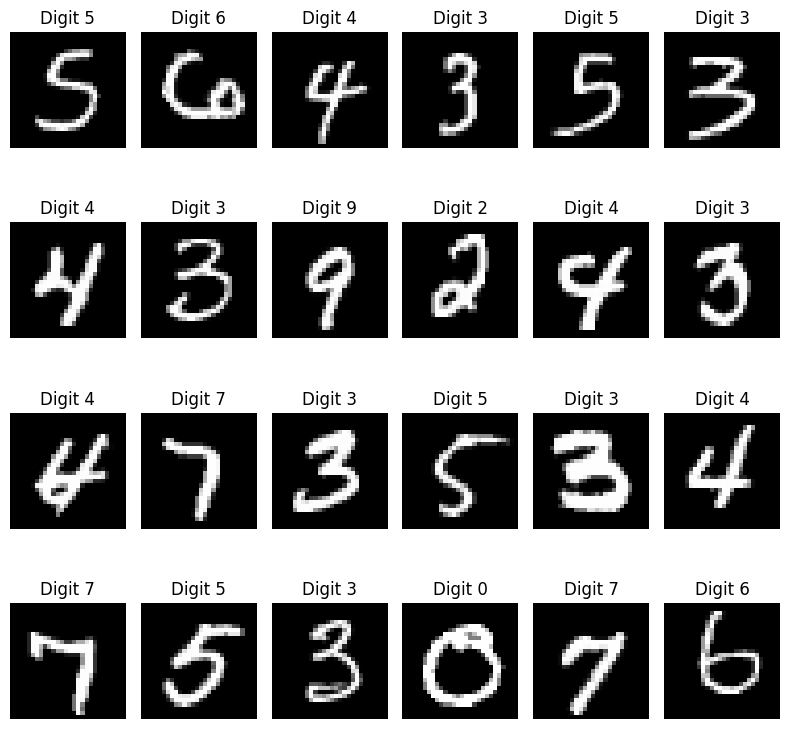

In [ ]:
# @title Plot images
def plot_images(images, labels):
  rows = 4
  cols = 6
  num_images = images.shape[0]

  fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

  for ir in range(rows):
    for ic in range(cols):
      sample = np.random.randint(0, num_images)
      image = images[sample].reshape(28, 28)
      axes[ir, ic].imshow(image, cmap='gray')
      axes[ir, ic].axis('off')
      axes[ir, ic].set_title(f"Digit {labels[sample]}")

  plt.tight_layout()
  plt.show()

plot_images(images, labels)

**Excercise:** Run the cell above multiple times and look at the images. Can you identify some images that may be difficult to classify?

## **Regression**

Avant de construire notre classifieur de chiffres, nous devons d'abord comprendre quelques concepts clés de l'apprentissage automatique.

La figure ci-dessous c'est une representation des donnees generees en utilisant la fonction sinus. En general, nous avons besoin de trouver une fonction qui mappe les entrees dans une dimension a des sorties dans une autre dimension. Le processus de trouver une telle fonction est appele **model** est communement appele dans divers domaines comme **regression**. Dans l'apprentissage automatique, cela fait reference a la recherche d'une fonction qui mappe un ensemble de valeurs numeriques appelees **features** a un autre ensemble de valeurs numeriques appelees **labels**. Si la fonction est lineaire, le processus est appele **regression lineaire**.

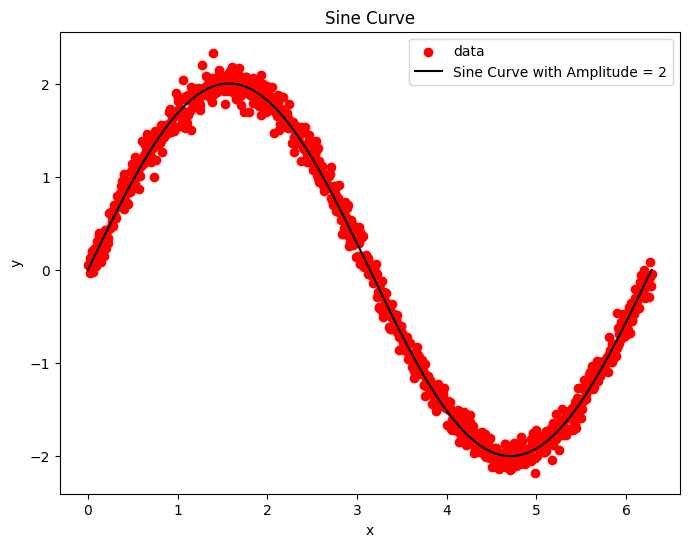

In [2]:
# @title Helper code to plot a Sine curve
amplitude = 2
x = np.linspace(0, 2*np.pi, 1000)
y = amplitude*np.sin(x) + np.random.randn(1000)*0.1   # Calculate y values using the sine function
yfit = amplitude*np.sin(x)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="data", color='red')
plt.plot(x, yfit, label=f'Sine Curve with Amplitude = {amplitude}', color='black')
plt.title('Sine Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.grid()
plt.show()

### 2.1 Linear regression - <font color='blue'>`Beginner`</font>

Supposons que nous avons une dataset, avec des element $y$ representant les labels et les elements $\mathbf{x}$ representant nos variables.
Notre objectif est de trouver une fonction $f$ qui mappe les variables $\mathbf{x} \in \mathbb{R}^d$ a la variable cible $y$:

 1.

Les modeles de regression lineare peuvent etre representer mathematicament comme suit:
$$ f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b,$$
Avec $\mathbf{w} \in \mathbb{R}^d$. $\mathbf{w}$ et $b$ sont les parametres du modele communement appele poids. Le terme $b$ est communement appele le biais et peut etre inclu dans $\mathbf{w}$ en etendant le vecteur de caracteristiques $\mathbf{x}$ avec 1.

Une facon intuitive de comprendre les equations ci-dessus est de se rappeler l'equation d'une ligne $$y \, = \, mx + c,$$ avec les poids et le biais correspondant a la pente et l'intercept, $m$ et $c$ respectivement.

**Note: pour le reste du tutoriel, nous utiliserons le framework JAX. Si vous n'etes pas familier avec JAX, veuillez d'abord suivre la section facultative de l'annexe sur [JAX](#scrollTo=742JhcnAxTof) avant de continuer.**

Code demonstration: linear model

In [ ]:
# Example implementation of a linear function computation.

x_key = jax.random.PRNGKey(0)
dim = 10
x = jax.random.uniform(x_key, (dim,))

w_key = jax.random.PRNGKey(1)
w = jax.random.uniform(w_key, (dim,))

b_key = jax.random.PRNGKey(2)
b = jax.random.uniform(b_key, (1,))

y = jnp.dot(w,x) + b  # can also be achieved using: y = x @ w + b

**Code task:**

Dans ce code nous avons demontré comment calculer la sortie d'une model de regression lineare avec un seul example dans notre donnée d'apprentrissage. Lorsque nous implementons les modeles d'apprentissage automatique nous tirons l'avantages de l'Algebre Lineare et et des ressources informatiques disponibles pour traiter des lots de données en une seule fois.

Avec une dataset ou ensemble d'apprentissage X in R, ecrire une function qui applique la regression lineare sur un lot des données x.

In [ ]:
# @title Run this to generate the data
# store the parameters in a dictionary
params = dict(w=w, b=b)

batch_size = 5
X = jax.random.uniform(x_key, (batch_size, dim))
data = jax.random.uniform(x_key, (batch_size,))

In [ ]:
def linear_model(params: Any, X: jnp.ndarray) -> jnp.ndarray:
  # complete this code
  w = params['w']
  b = ... # update me. hint look at the above line for w

  # compute m = f(x) here using w,b and X
  m = ... # update me.

  return m


In [ ]:
# @title Run me to test your code

def test_linear_model():
  assert (linear_model(params, X) == X @ w + b).all()
  print("Nice! Your answer looks correct.")

test_linear_model()

In [ ]:
# @title Solution - linear model (Try not to peek until you've given it a good try!')
def linear_model(params: Dict[str, jnp.ndarray], X: jnp.ndarray) -> jnp.ndarray:
  # complete this code
  w = params['w']
  b = params['b']

  # compute m = f(x) here using w,b and X
  m = X @ w + b

  return m

#### La function cout et son optimization - <font color='blue'>`Beginner`</font>


**Loss function**

Quant nous utilisons un model pour apprendre a partir des données, nous avons besoin d'une function qui mesure la performance du model. Cette function est appele **function cout**. Elle mesure la quantite d'erreur entre notre model et les données.

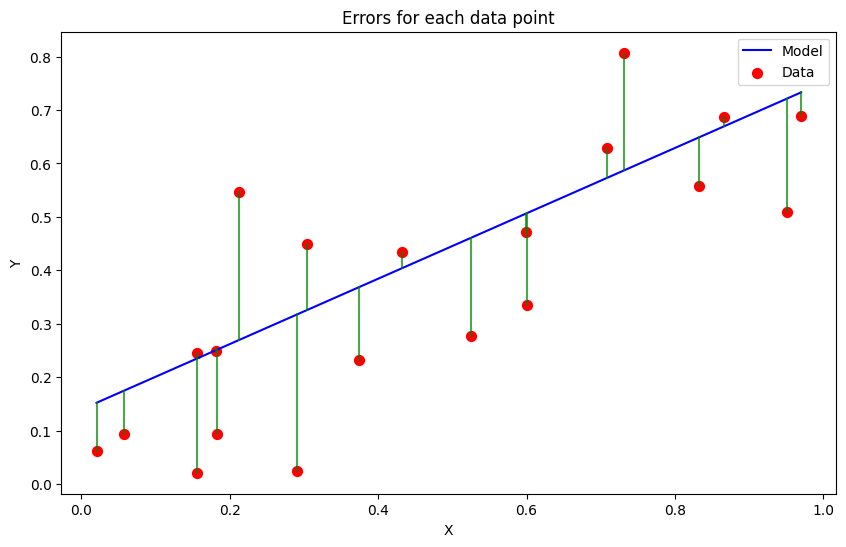

In [ ]:
# @title Helper code to plot errors

# Set random seed for reproducibility
np.random.seed(42)

# Number of points to generate
num_points = 20

# Generate random points and lines
points_x = np.random.rand(num_points)
slope_random_line = np.random.rand()
intercept_random_line = np.random.rand()

points_y = slope_random_line*points_x + intercept_random_line + np.random.normal(0, 1, num_points)*0.15

# Function to calculate distance from point (x, y) to the line y = mx + b
def distance_to_line(x, y, m, b):
    return abs(y - m * x - b) / np.sqrt(1 + m**2)

# Calculate distances from each point to the random line
distances = distance_to_line(points_x, points_y, slope_random_line, intercept_random_line)

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot the random line
plt.plot(np.sort(points_x), slope_random_line * np.sort(points_x) + intercept_random_line, c='blue', label='Model')

# Plot the points
plt.scatter(points_x, points_y, c='red', label='Data', marker='o', s=50)

# Plot lines from each point to the random line (in different colors)
for i in range(num_points):
    plt.plot([points_x[i], points_x[i]], [points_y[i], slope_random_line * points_x[i] + intercept_random_line],
             c='green', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Errors for each data point")
plt.legend()
plt.show()


Considerer la figure ci-dessous avec les points en rouge. Si la ligne bleue est notre model, alors les lignes verticales representent les erreurs que nous faisons sur chaque point de données. La function cout essaye de capturer l'erreur total que nous faisons pour chaque point de données. Une function cout que nous pouvons utiliser dans ce cas est l'erreur moyenne quadratique entre les valeurs predites et les vraies valeurs.


C'est equivalent a la somme de toutes les distances en vert. Cela peut etre ecrit mathematiquement comme suit:
$$ \mathcal{L}(\mathbb{θ}) \, = \, \frac{1}{m}∑_{i}({y_i - \hat{y}_i})^2,$$
Avec $\mathbb{θ} = [\mathbf{w}, b]$,  $\mathcal{L}$ denote la function cout, $\hat{y}$ represente la valeur predite par le model et $m$ est le nombre total des points de données.

En inserrant la fonction de regression lineare dans la function cout, nous obtenons:

$$\mathcal{L}(\mathbb{θ}) \, = \, \frac{1}{m}∑_{i}(y_i - \mathbf{w}^T\mathbf{x}_i - b)^2. $$


<font color='red'>Note: il existe differentes functions cout que nous pouvons utiliser dans ce cas. Vous pouvez voir d'autres functions cout communes [ici](https://www.geeksforgeeks.org/ml-common-loss-functions/).</font>



**Code task:** Implement the loss function above using the linear model function defined above.



In [ ]:
def loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):
  # complete this code

  pred = linear_model(params, X)

  loss = ... # your code here

  return 0

In [ ]:
# @ Run to test my code
def test_linear_loss_fn():
  pred = linear_model(params, X)
  loss = jnp.mean((pred-y)**2)
  assert loss_fn(params, X, data) == loss
  print("Nice! Your answer looks correct.")

test_linear_loss_fn()

In [ ]:
# @title Sample solution (Try not to peek until you've given it a good try!')
def loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):
  # complete this code

  pred = linear_model(params, X)

  loss = jnp.mean((m-y)**2)

  return loss

**Excercise:** Dicuss in groups how we can find the parameters, $\mathbb{θ}$.

**What is optimization?**
** C'est Quoi l'optimization?**

L'optimization comme son nom l'indique, c'est la procedure de trouver les parametres optimales du models. ie un ensemble des parametres qui minimize la function cout. Mathematically this is represented as follows



$$\hat{\theta} \,= \, \underset{\mathbf{\theta}}{\operatorname{argmin}} \frac{1}{m}∑_{i}(y_i - \mathbf{w}^T\mathbf{x}_i - b)^2.$$

<font color='red'> How do we optimise </font>: The figure below is an example plot of the loss at different values of $\mathbf{w}$ and $b$ for a straight line. The minimum value is indicated with the star. Our goal in optimization is to identify this point.   

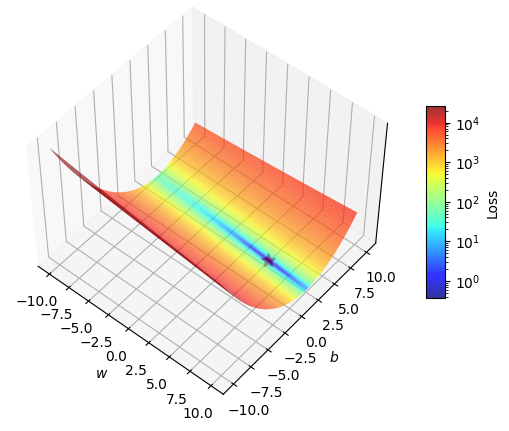

In [ ]:
# @title Helper code (to visualise loss landscape)
# Define the loss function (Mean Squared Error)
from matplotlib.colors import LogNorm

def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Create a grid of weight (slope) and bias (intercept) values
weight_values = np.linspace(-10, 10, 200)
bias_values = np.linspace(-10, 10, 200)
weight_grid, bias_grid = np.meshgrid(weight_values, bias_values)

# Generate random data points for demonstration
np.random.seed(0)
x = np.linspace(0, 20, 200)
y_true = 3 * x + 5 + 0.1 * np.random.normal(0, 1, 200)
y_min = 3*x + 5
minima = np.array([5, 3])
loss_min = loss_function(y_true, y_min)

# Compute the loss for each combination of weight and bias values
loss_grid = np.zeros_like(weight_grid)
for i in range(len(weight_values)):
    for j in range(len(bias_values)):
        y_pred = weight_values[i] * x + bias_values[j]
        loss_grid[i, j] = loss_function(y_true, y_pred)

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

surf = ax.plot_surface(weight_grid, bias_grid, loss_grid, norm=LogNorm(), rstride=1, cstride=1,
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima, loss_min, 'r*', markersize=10)

ax.set_xlabel('$w$')
ax.set_ylabel('$b$')
# Remove z-axis ticks and labels
ax.set_zticks([])
ax.set_zticklabels([])

# Add color bar for reference
cbar = plt.colorbar(surf, shrink=0.5, aspect=10)
cbar.ax.set_ylabel('Loss')

# ax.set_xlim((xmin, xmax))
# ax.set_ylim((ymin, ymax))
plt.show()

Une approche brutale **(brute force)** serais de calculer la fonction cout pour divers valeur de theta et choisir une valeur de theta avec un cout minimale. Bien que cette approache peut marchée avec un model de 1 ou 2 parametres, c'est une approache tres compliques pour une plusieur parametres.

**Gradient based optimization**

La meilleur approache c'est d'utiliser l'analyze lineare . La derivée d'une fonction es zero a tous point critique (maximum et mininum). Pour trouver $\theta$ qui minimize le cout nous devons resoudre l'equation. $$\frac{\partial \mathcal{L}}{\partial \theta} \,=\, 0.$$

**Exercise 2:** [OPTIONAL] Can you work out the following expressions for the derivatives of the loss function?

$$\frac{∂ \mathcal{L}}{\partial \mathbf{w}} = \frac{2}{m}∑_{i}\mathbf{x}_i(\mathbf{w}^T\mathbf{x}_i + b - y_i),$$

$$\frac{∂ \mathcal{L}}{\partial b} = \frac{2}{m}∑_{i}(\mathbf{w}^T\mathbf{x}_i + b - y_i).$$

Solution here in the [Appendix](#scrollTo=kh_8f4gKyufu).

Heuresement nous ne pouvons pas calculer cette function par nous meme. Les libraries de machine learning possedent des tools pour optimizer ces functions pour nous. en jax nous pouvons utilser jax.grad.

In [ ]:
# @title Computing derivatives with jax.grad
# Computing derviatives with jax

def quadratic_fn(x):
  return x**2


# Compute the derivative of quadratic_fn when x = 1
grad_fx =  jax.grad(quadratic_fn)(1.0)
assert grad_fx == 2.0
print(f"Gradient of the function x**2 at x = 1 is {grad_fx} as expected.")

Plus important Jax calcule la derivée de la meme facon meme si nos parametres sont passe dans un autre type de donnees comme un dictionnaire. Par example, nous pouvons calculer la derivée de notre function cout comme suit.

In [ ]:
# Compute derivatives of the loss_fn with respect to params

grads = jax.grad(loss_fn)(params, X, data)
print(f"gradients: {grads}")

Another similar function in Jax is `jax.value_and_grad` which returns both the value of the function and the gradient.

In [ ]:
# Compute derivatives of the loss_fn with respect to params

loss, grads = jax.value_and_grad(loss_fn)(params, X, data)
print(f"loss: {loss}")
print(f"gradients: {grads}")

#### Training the model using Jax - <font color='blue'>`Beginner`</font>

**La Descente de gradient (Gradient Descent)**

Maintenant que nous avons la derivée de notre function cout, nous pouvons utiliser la methode de la descente de gradient pour trouver les parametres qui minimize le cout. La descente de gradient est une methode iterative qui commence avec un ensemble aleatoire des parametres et les met a jour a chaque iteration en utilisant la formule suivante:


1.  Initialise les parametres avec des valeurs aleatoires.
2. Boucle pour un nombre d'iterations et a chaque iteration met a jour les parametres en utilisant la formule suivante.

$$ \mathbf{\theta} = \mathbf{\theta} - η\frac{∂\mathcal{L}}{∂\theta},$$
$\eta$ c'est notre frequence d'apprentissage. c'est un hyperprametre de notre modele, nous devons le choisir avant.

Intuitivement, si ce parameter est optimal, le gradient `formule` sera zero et les parametres deviennent statiques, raison pour laquelle le critere que nous utilison pendant l'entrainment c'est de verifier si les. parametres on arretée de changer also connu  as convergence.
Lorsque nous utilisons un seul point pour calculer la descente de gradient l'algorithm est appelée **la descente du gradient stocastic.**
Lorsque nous utilisons l'ensemble de notre dataset l'agorithm est appelée la descente **du gradient en batch.** En pratique l'approacth a utilisé c'est est petit group de données a chaque etapes. Cette approach s'appele **mini batch gradient descent.**


Pendant l'apprrentissage nous parcourons notre dataset pour chaque iteration. Le parcours de notre dataset s'appele epoch.

Raison pour laquelle un autre hypermeter dont nous somme familier c'est l'epoch.

In [ ]:
# @title Code demonstration: Batch gradient descent implementation
def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Batch gradient descent basic jax implementation.

  Args:
    loss_fn
      the loss function for our model.
    params:
      the initial parameters of the model.
    training_data
      a tuple with the features and targets for training.
    val_data
      a tuple with the features and targets for validation.
    learning_rate
      learning rate
    num_epochs
      number of epochs
    batch_size:
      size of every mini batch
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Create empty list to store the training and validation loss.
  loss_train = [] # training loss
  loss_val  = [] # valisation loss

  # Define a function that computes loss and gradients
  loss_and_grad = jax.value_and_grad(loss_fn)

  n_iter = 0 # number iterations
  for epoch in range(num_epochs):
    # Shuffle the data before every epoch
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]

      # Compute loss and gradients using value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train.append(loss)

      # Compute the validation loss
      loss_v = loss_fn(params, X_val, y_val)
      loss_val.append(loss_v)

      # Update the parameters
      params = jax.tree_map(lambda p, g: p -learning_rate*g, params, grads)

      # Update the iter count
      n_iter += 1


  # Plot training and validation loss
  iters = range(1, n_iter+1)
  plt.plot(iters, loss_train, label='Training Loss')
  plt.plot(iters, loss_val, label='Validation Loss')
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  # Display the plot
  plt.show()

  return params

In [ ]:
# @title Let's create some dummy data to test the code
def create_dummy_data_linear_regression():
  """We will generate some random data using our linear function above to test the gradient decent implementation"""

  num_samples = 200
  num_features = 1  # Modify this to have more features

  # Generate random X values in the range [0, 10] for each feature
  key = jax.random.PRNGKey(0)
  X = jax.random.uniform(key, (num_samples, num_features), minval=0, maxval=10)

  # Generate y values based on a linear relationship with some noise
  w = jnp.array([3.0])  # True coefficients for each feature
  b = jnp.array([5.0])

  params = dict(w=w, b=b)
  y = linear_model(params, X)

  # Add some noise
  noise = jax.random.normal(key, shape=(num_samples,))*0.30
  y = y + noise

  # Step 2: Split the data into training and validation sets
  train_fraction = 0.8
  num_train_samples = int(train_fraction * num_samples)

  # Shuffle the indices to randomly split the data
  key, subkey = jax.random.split(key)
  shuffled_indices = jax.random.permutation(subkey, jnp.arange(num_samples))

  # Split the indices into training and validation sets
  train_indices = shuffled_indices[:num_train_samples]
  val_indices = shuffled_indices[num_train_samples:]

  # Get the corresponding data points for training and validation sets
  X_train, y_train = X[train_indices], y[train_indices]
  X_val, y_val = X[val_indices], y[val_indices]

  train_data = (X_train, y_train)
  val_data = (X_val, y_val)

  # create some random initial params
  w_init = jax.random.normal(key, shape=(num_features,))
  b_init = 0.0
  initial_params = dict(w=w_init, b=b_init)

  return train_data, val_data, initial_params


def plot_linear_fit(params, X, y):
  """Overlay the data and fitted model"""

  y_pred = linear_model(params, X).squeeze()
  xval = X[:,0]

  plt.figure(figsize=(8, 6))
  plt.scatter(xval, y, label='Data', color='blue')
  plt.plot(xval, y_pred, label='Fit', color='red')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.title('Scatter Points and Fitted Curve')
  plt.show()




In [ ]:
train_data, val_data, initial_params = create_dummy_data_linear_regression()

In [ ]:
params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=0.01, num_epochs=2, batch_size=10)

# plot the results on validation data
Xval, yval = val_data
plot_linear_fit(params, Xval, yval)

Our model seems to be **underfitting** that data because the fitted line is going through very few of the points.

Notre model semble **underfitting** les données parce que la ligne ajustée passe par très peu de points.

**Exercise:** Discuter en groupe comment nous pouvons ameliorer notre model.

**Code task:** Modifier le taux d'apprentissage, la taille du lot et le nombre d'epochs et observer leurs effets sur les resultats.

**Tips:**

- En pratique, les gens choisissent généralement des taux d'apprentissage dans la plage de 0,01 et 1e-5.
- Les petites tailles de lots peuvent introduire trop de bruit dans les gradients et cela peut affecter la vitesse de convergence.
- D'autre part, les grandes tailles de lots peuvent prendre plus de temps à converger car les paramètres ne sont pas mis à jour très fréquemment.
- Noter que l'utilisation d'un très grand nombre d'epochs rendra l'entraînement long car nous n'avons inclus aucun critère d'arrêt.

In [ ]:
# @title Your code here
learning_rate = 3e-4 #@param {type:"slider", min:1e-5, max:1e-2, step:1e-4}
batch_size = 20 #@param {type:"slider", min:1, max:5000, step:10}
num_epochs = 100 #@param {type:"slider", min:2, max:500, step:20}

params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=learning_rate, num_epochs=num_epochs, batch_size=bathc_size)

# plot the results on validation data
Xval, yval = val_data
plot_linear_fit(params, Xval, yval)

### 2.2 Non linear regression and neural networks  - <font color='blue'>`Beginner`</font>

In [ ]:
# @title Helper code to plot non-linear data
def plot_nonlinear_data():

  x = np.linspace(-5, 5, 100)
  y = np.cos(x)*x + x**2 + np.exp(-x/7)*3 + 0.3*x*np.sin(x)**4

  plt.scatter(x, y)
  plt.title("Example of non linear data")
  plt.show

plot_nonlinear_data()

La regression lineare est une methode simple et puissance pour la prediction. Malheuresment il possede des limitiations lorsqu'on doit capturer des relations complexes. Pour modeliser ses genres de complexitée, we avons besoin des model puissants. Par example aucune line peut s'ajuster aux données de la figure precedante. 
Les models non lineares comme la regression polynomiales, exploential et les function trigonometriques offent des solution a ce probleme.

A cause de l'explosion des techniques de l'apprentissage profond(deep learning) adjuster les function pre definit a nos dataset etait les methodes par excellence pour nos machine learning approaches. 
le SVM, Naive de Bayes, K-means sont les approaches classiques dans ces methodes.

Dans cette section nous allons introduire les reseau des neurones sont a la base des methodes d'apprentissage profond et du recent succes dans le machine learning.

#### Model representation - <font color='blue'>`Beginner`</font>


<center>
<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/neutral-network-diagram.svg" width="80%" />
</center>

      Image of a neural network with 3 hidden layers. Credit: https://www.tibco.com/reference-center/what-is-a-neural-network





Les Reseaux de Neurones sont un ensembles des modeles du machine learning inspirer par maniere que le cerveau humain fonctionne.  

Contrairement a la regression lineare qui applique une seule transformation aux données, les reseaux des neurones traitent les données d'entrée à travers une serie des transformations avant d'atteindre la couche de prediction finale. Le terme <font color='red'>Deep Learning</font> vient des nombreuses transformations appliquées aux données d'entrée.


Dans l'image ci haut les cercle representent les noeuds et les liens qui les connectent representent les parametres du model.

#### Activation functions - <font color='blue'>`Beginner`</font>

Les function d'activation sont important dans les reseaux des neurones. The input to every node es une function lineares des nodes de la couche precedante. Sans appilques la function d'activation, ou non linearite, l'ensemble du reseaux , peu importe les nomber des couche il possede serais un simple model lineare.  Raison pourl laquelle  les function d'activation sont utilisée pour construire des relation non lineare complexe.


L'equation pour le noeud $i$ dans la couche $j$ d'un reseau des neurones peut etre exprimer comme suit:

$$ \text{Output}_{ij} = \text{Activation Function} \left( \sum_{k=1}^{n} \text{Weight}_{ijk} \times \text{Output}_{(j-1)k} + \text{Bias}_{ij} \right)$$

Where:
- $\text{Output}_{ij}$ is the output of node $i$ in layer $j$.
- $\text{Weight}_{ijk}$ is the weight connecting node $i$ in layer $j$ to node $k$ in layer $j-1$.
- $\text{Output}_{(j-1)k}$ is the output of node $k$ in layer $j-1$.
- $\text{Bias}_{ij}$ is the bias term for node $i$ in layer $j$.
- $\text{Activation Function}$ is the chosen activation function that introduces nonlinearity to the output of the neuron.




Voici quelques function d'activation  le plus utilisée:

- $\text{ReLU}(x) \, = \, \text{max}(0, x)$

    La fonction d'activation Rectified Linear Unit (ReLU) est la plus populaire. Elle mappe son entree dans l'intervalle $[0, ∞]$ en transformant toutes les valeurs negatives en 0. La fonction et sa derivée sont monotones. Cependant, cette fonction d'activation a le probleme de transformer toutes les entrees negatives en 0 et de diminuer la capacite du modele a bien s'adapter aux donnees.

- $\text{Sigmoid}(x) \, =\, \frac{1}{1+e^{-x}}$

    La fonction d'activation sigmoid mappe son entree dans l'intervalle $[0, 1]$. C'est ideal pour predire les probabilites. La fonction est differentiable et monotone mais sa derivée n'est pas monotone. Parce que sa derivée n'est pas monotone, il n'est pas ideal d'utiliser cette fonction d'activation dans les couches cachees car elle bloque le transfert d'informations entre les couches. Par consequent, l'activation est appliquee uniquement aux couches de sortie.

- $\text{tanh}(x)\, = \, \frac{e^x - x^{-x}}{e^x + e^{-x}},$
  
     L'activation $tanh$ est similaire a l'activation sigmoid mais elle mappe les entrees dans l'intervalle $[-1, 1]$. Cette plage plus large permet une repartition beaucoup plus uniforme lors de la prediction des probabilites. De meme que l'activation sigmoid, le $tanh$ est le plus souvent applique aux couches de sortie des reseaux des neurones.


Let's implement the popular [ReLU](https://arxiv.org/https://arxiv.org/abs/1803.08375abs/1803.08375) activation function.

In [ ]:
# Implementation of relu using simple python.

def relu(x):
  if x > 0 :
    return x
  else:
    return 0

def plot_activation(act_fn, label="act_fn"):
    max_int = 5
    # Generete 100 evenly spaced points from -max_int to max_int
    x = np.linspace(-max_int, max_int, 1000)
    y = np.array([act_fn(xi) for xi in x])
    plt.plot(x, y, label=label)
    plt.legend(loc="upper left")
    plt.xticks(np.arange(min(x), max(x) + 1, 1))
    plt.show()

plot_activation(relu, label='ReLU')

**Code Task:** Implement and plot another activation function of your choice.

In [ ]:
# @title Your code here
def act_fn(x):
    # type your code here

    y = ...#
    return y

# Call the plotting function
plot_activation(act_fn, label=....) # update this



#### Building a simple neural network model with Jax - <font color='blue'>`Beginner`</font>

Heuresement, nous avons different module dans jax qui peuvent etre utiliser pour developer des reseaux des neurnoes et nous allons rien implenter from scratch. Pour les models avec jax nous pouvons utiliser haiko and flax. Certaines optimization avancées nous pouvons utiliser optax. Dans cette section nous allons utiliser haiko pour implenter un simple reseau de neurones a 4 couches. 



In [ ]:
# @title Code demonstration: building a simple neural network with flax
# Code for a 4-layer neural network using haiku.
# Here assume all the hidden layers have the same number of nodes.
# We will use the same activation relu for all the layers except the last layer.

class Network(nn.Module):
  hidden_size: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

The cell above is a basic example of how we can define a neural network using flax. Each linear transformation is implemented using the `nn.Dense` function, and we use `jax.nn.relu` to apply non-linearities to the output of each layer.

In [ ]:
# @title Code demonstration: intialising the model
seed = 32
input_size = 4
hidden_size = 5
output_size = 1

# Calling the build_neural_network function and applying the required transformations
model = Network(hidden_size, output_size)

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

# Let's use the CLU: https://github.com/google/CommonLoopUtils to examine the shape of the parameters
print(parameter_overview.get_parameter_overview(initial_params, include_stats=False))

+-----------------------+--------+------+
| Name                  | Shape  | Size |
+-----------------------+--------+------+
| params/Dense_0/bias   | (5,)   | 5    |
| params/Dense_0/kernel | (4, 5) | 20   |
| params/Dense_1/bias   | (5,)   | 5    |
| params/Dense_1/kernel | (5, 5) | 25   |
| params/Dense_2/bias   | (1,)   | 1    |
| params/Dense_2/kernel | (5, 1) | 5    |
+-----------------------+--------+------+
Total: 61


**Exercise:** Do you understand the shape of the different parameters?

Les code ci haut demontrent comment creer une instance du model et obtenir les parametres initiaux. Apres avoir creer une instance du model en utilisant la class `Network` nous appelons la function `init` avec un `jax.random.PRNGKey` et quelques entrees factices a partir desquelles la forme des parametres sera predit.



Pour appliquer le model a des données nous avons besoin d'appeler la function `model.apply` avec les parametres actuels et les données d'entrée.

In [ ]:
z = model.apply(initial_params, dummy)
print(f"Model ouput shape: {z.shape}, Input shape: {dummy.shape}")

Model ouput shape: (1, 1), Input shape: (1, 4)


## **Classification**
Maintenant que nous nous sommes familiarisé avec les fondenmentaux de l'aduustement d'un model,et son entrainement net que nous savons comment construire les reseaux des neuronnes, nous allons nous focaliser sur notre objectif principale qui es la construction de notre classeur des nombres.


### 3.1 Logistic regression - <font color='blue'>`Beginner`</font>

La regression lineaire a pour objectif de trouver une function $f$ qui mappe nos **inputs $x$**, ou $x \in \mathbb{R}^d$ a la **output/target - $y$**, ou $y \in \mathbb{R}^n$ (les valeurs de sortie sont continues). Contrairement a la regression, la **output/target -$y$** ne peut prendre que certaines valeurs dans la regression logistique. Lorsque la **target** ne peut prendre que l'une des deux valeurs, l'algorithme est appelé **Classification Binaire**. Lorsque nous avons plus de deux catégories, on parle de **Classification Multi-Classes**.

C'est pourquoi l'objectif de la regression logistique (dans le cas de la classification binaire) est de mapper les **inputs $x$**, où $x \in \mathbb{R}^d$ à $y$, où $y \in \{0,1\}$.


Par example, si nous construisons un classeur d'images pour chien et chat, 1 peut etre utiliser pour representer les valeurs de target pour les chats et 0 pour les chiens.

#### Logits and Fonction Sigmoide - <font color='blue'>`Beginner`</font>
Vue que la sortie de la regression logistiqu sont discret. C'est n'est pas facile de definir une function qui produit les valeur discretes. Raison pour laquele nous construisons notre function pour predire les probabilitées. Rappelons que les probabilitee prenent des valeurs dans l'intervale [0, 1], raison pour laquelle nous avons besoins d'une functino qui produit des probabilitées.  Comment nous l'avons mentioner precedament, une bonne activation function c'est la **function sigmoide.**
<br>
<center>

 $$\sigma(x) = \frac{1}{1+e^{-x}}$$

 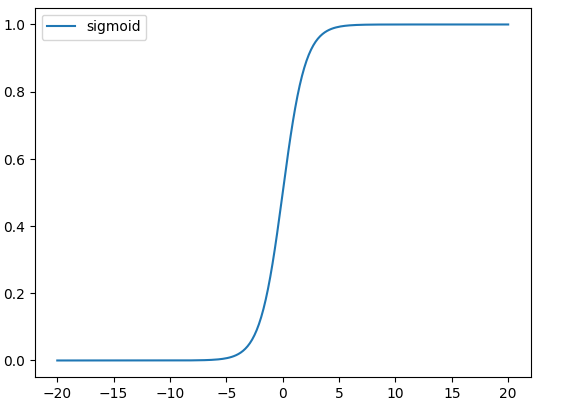
</center>
<br>
<br>


**Cross entropy loss function**

Vue que la classification binaires nous ne pouvons qu'avoir deux valeurs de sortie, la funciton de l'erreur moyene quadratique que nous avons vue precedenment ne peut pas marcher avec la regression logistique. La function la plus utilisée c'est **la function cross entropy** qui est define de la facon suivante: 


<br>
<center>

 $$ -y_i \log(p_i) - (1-y_i) \log (1-p_i),$$

</center>
where $p_i = \sigma (z)$ with $z$ being the output of our model function.
<br>

**Code task**:

1. Implementer la fonction d'activation sigmoid.
2. Implementer la fonction de cout cross entropy.


In [ ]:
def sigmoid(x):
    """sigmoid function 1/1+e^-x"""

    prob = ... # update me

    return prob

In [ ]:
# @title Run me to test your code
def test_sigmoid_fn():
  x  = np.array([0.7, 0.3, 0.8, 0.2])
  assert jnp.allclose(sigmoid(x), jax.nn.sigmoid(x)), "Test failed!"
  print("Nice! Your answer looks correct!")

  return

In [ ]:
# @title sigmoid solution (Try not to peek until you've given it a good try!')
def sigmoid(x):
  prob = 1/(1+jnp.exp(-x))

  return prob

In [ ]:
def cross_entropy_loss(predictions, targets):
    # you need to make sure we never have log of 0

    # use sigmoid to compute the probs from the predicitions
    probs = ... # update me

    # your code here
    loss = ... # update me

    return loss

In [ ]:
# @title Run me to test your code
def test_cross_entropy_loss():
  predictions = np.array([0.7, 0.3, 0.8, 0.2])
  targets = np.array([1, 0, 1, 0])

  # Expected cross-entropy loss for the test data
  expected_loss = 0.60669523

  # Calculate the cross-entropy loss using the implemented function
  computed_loss = cross_entropy_loss(predictions, targets)

  assert jnp.isclose(computed_loss, expected_loss), "Test failed!"

  # If the assert statement does not raise an exception, the test is passed.
  print("Nice! Your anwser looks correct")

  return

test_cross_entropy_loss()

Nice! Your anwser looks correct


In [ ]:
# @title Cross entropy loss solution (Try not to peek until you've given it a good try!')
def cross_entropy_loss(preds, targets):
    eps = 1e-15
    probs = sigmoid(preds)

    loss = -targets*jnp.log(probs+eps) - (1-targets)*jnp.log(1-probs+eps)

    return jnp.mean(loss)

#### Extending to Multi-class classification

Avec la classification multi -classe, le model est construit de facon a supporter plusieur classes. Avec chaque classe qui represente une category ou un label. Par example, dans le cas d'une classification des nombres , nous avons 10 classes, chaqueclasse representte un nomber de 0 a 9.

La sortie du model es la distribution de probabilité dasn chaque lcasse, avec chaque classe avec sa probalitée.  La dimension de notre sortie correspond au nobre des classe. Par example un classeur avec 3 classes aura un vecteur a 3 dimensions.
Pour predire le model selectionne la classe avec la plus grande probablilite comme la classe predite pour notre donnée en entrée.

**Encodage One-hot: or one hot encoding**

L'encodage one hot est une facons de representer les variables categoriques comme les classe comme des vecteurs binaries. Dans le cas d'une classification binaire avec 3 classes, notre sortie est representée commen un vecteur one hot de la maniere suivante.

classe 1 [1, 0, 0]: ceci veut dire que notre donnée appartient a la premier classe. Le premier element du vecteur es 1 et les autres zeros.


classe 1 [0, 1, 0]: ceci veut dire que notre donnée appartient a la deuxieme classe. Le deuxieme element du vecteur es 1 et les autres zeros.

classe 1 [0, 0, 1]: ceci veut dire que notre donnée appartient a la troisieme classe. Le troisieme element du vecteur es 1 et les autres zeros.

Exercice discuter comment on define la funciton cou pour la classification multi classe.


La fonction cout pour une classification multi classe es defiine de la meme manier que la function pour un classeur binaire. Par contre pour ce cas nous le definission comme une soome ddu cout pour chaque classe pris separement...

We can use `jax.nn.one_hot` function to one-hot encode our data.


In [ ]:
# An example using one hot encoding
num_classes =  3
targets = jnp.array([2, 0, 1])
one_hot_targets = jax.nn.one_hot(targets, num_classes)
print(f"Example of One hot encordings: {one_hot_targets}")

Example of One hot encordings: [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


**Exercise**: Discuss with your neighbour how we should define the loss function in the case of multi-class classification.

**Solution**: The loss function for a multi-classification is computed similarly to that of a binary classifier. However in this case we define the loss as the sum of the loss for each of the individual classes.
<br>
<center>

 $$ \sum_c -y^c_i \log(p^c_i),$$

</center>

where $p^c_i = \text{softmax}(z) = \frac{e^{z^c_i}}{\sum_c e^{z^c_i}}$ with $z$ being the output of our model function.

<br>
The main difference here is that we use a $\text{softmax}$ activation function instead of $\text{sigmoid}$ as for the binary case.

**Exercise 3 [OPTIONAL]**: Do your get the initution why this formula is similar to that for the binary case?

**Solution**: Scroll to the [Appendix](#scrollTo=fRYbQvz01Zlm).

**Code task**:
  1. Implement the softmax activation function
  2. Implement a cross entropy loss function for multiclass classification using softmax and one hot encoding.

In [ ]:
def softmax(logits):
  """Compute softmax: `exp(x)/sum(exp(x))`

  Args:
    logits: array of shape (num_samples, num_classes)

  Return:
    probs: array of shape (num_samples, num_classes)
  """

  # your code here
  # make sure you sum across the right axis

  probs = ... # update me

  return probs

In [ ]:
# @title Run me to test your code
def test_softmax():
  x = jnp.array([[1.0, 0.4, 0.3], [10.0, 4.6, 8.9]])
  assert jnp.allclose(softmax(x), jax.nn.softmax(x, axis=-1))
  print("Nice! Your answer looks correct.")

test_softmax()

In [ ]:
# @title softmax solution (Try not to peek until you've given it a good try!')
def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)

In [ ]:
def cross_entropy_softmax_loss(predictions, targets):
    """Compute the cross entropy softmax loss function

      Args:
        predictions: (num_samples, num_classes)
        targets: (num_samples)
    """

    # Compute the softmax probabilities
    probs = ... # update me

    num_classes = ... # update me

    # One-hot encode the targets
    targets_one_hot = ... # update me

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss = ... # update me

    return loss

In [ ]:
# @title Run me to test your code
def test_cross_entropy_softmax_loss():
  # Fixed predictions (logits) for each class
  predictions = jnp.array([[1.5, 0.3, 2.7],
        [0.8, 1.2, 3.1], [2.3, 1.7, 0.5],
        [3.0, 0.5, 1.2], [0.2, 2.8, 1.0]])

  # Fixed true class labels
  targets = jnp.array([2, 1, 0, 0, 2])

  # Expected loss computed manually
  expected_loss = 1.0456787

  # Compute the cross-entropy softmax loss using your implementation
  loss = cross_entropy_softmax_loss(predictions, targets)

  # Check if the computed loss matches the JAX built-in loss
  assert jnp.allclose(loss, expected_loss), "Loss value do not match!"

  print("Nice! Your answer looks correct.")

test_cross_entropy_softmax_loss()

Nice! Your answer looks correct.


In [ ]:
# @title Cross entropy softmax solution (Try not to peek until you've given it a good try!')
def cross_entropy_softmax_loss(predictions, targets):
    """Compute the cross entropy softmax loss function

      Args:
        predictions: (num_samples, num_classes)
        targets: (num_samples)
    """

    # Compute the softmax probabilities
    probs = softmax(predictions) # update me

    num_classes = predictions.shape[-1]

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes) # update me

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1) # update me

    return jnp.mean(loss_i)

#### Simple Reseau de neurones pour la classification - <font color='blue'>`Beginner`</font>

Dans cette section nous allosn mettre en place toutes le s differentes pieces et entrainer notre resaux de neurones pour la classification. Rappelons les outils que nous avons mentionner initialement qui sont necessaire pour entrainer un modele de machine learning.

- Nos donnée d'apprentissage ou dataset.
- La function du modele
- la function cout
- et la fonction d'optimization
Nous allons utiliser sklearn, nous n'allons pas discutter le data processing mais en pratique nous faisons le data processing avant. 


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import jax
import jax.numpy as jnp
from typing import NamedTuple, Any

import matplotlib.pyplot as plt
import numpy as np

# Let re-adapt our batch gradient descent function
def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Batch gradient descent basic jax implementation.

  Args:
    loss_fn
      the loss function for our model.
    params:
      the initial parameters of the model.
    training_data
      a tuple with the features and targets for training.
    val_data
      a tuple with the features and targets for validation.
    learning_rate
      learning rate
    num_epochs
      number of epochs
    batch_size:
      size of every mini batch
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Create empty list to store the training and validation loss.
  loss_train = [] # training loss
  loss_val  = [] # valisation loss

  # Define a function that computes loss and gradients
  loss_and_grad = jax.value_and_grad(loss_fn)

  for epoch in range(num_epochs):
    # Shuffle the data before every epoch
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)

    loss_train_epoch = []

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]
      # Compute loss and gradients using value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train_epoch.append(loss)

      # Update the parameters
      params = jax.tree_map(lambda p, g: p -learning_rate*g, params, grads)

    # We need to turn the list in to an array before applying jnp.mean
    mean_loss = jnp.mean(jnp.array(loss_train_epoch))
    loss_train.append(mean_loss)

    # Compute the validation loss at the end of the epoch
    loss_v = loss_fn(params, X_val, y_val)
    loss_val.append(loss_v)

  # Plot training and validation loss
  epochs = range(1, num_epochs+1)
  plt.plot(epochs, loss_train, label='Training Loss')
  plt.plot(epochs, loss_val, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  # Display the plot
  plt.show()

  return params

# Load the mnist dataset
def load_dataset(seed):
  mnist = fetch_openml(name='mnist_784', version=1, as_frame=False)
  # Extract the data and labels
  images, labels = mnist.data, mnist.target

  # These images consist of integer values from 0 to 255.0
  # We scale the images to min and max of 1
  x_max = 255.0
  x_min = 0.0

  images = (images - x_min)/(x_max - x_min)
  images = images.astype(jnp.float32)
  labels = labels.astype(jnp.float32)

  # These are images of shape 28x28 which have been flatten to shape 784
  X_train, X_test, y_train, y_test = train_test_split(
      images, labels, test_size=0.2, train_size=0.8, random_state=seed
  )

  train_dataset = (X_train, y_train)
  test_dataset = (X_test, y_test)

  return train_dataset, test_dataset

training_data, val_data = load_dataset(32)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Code task:**
1. Build a neural network that outputs logits for each of the 10 classes.
2. Initialise your model with some dummy input.
3. Define your softmax cross entropy function.

In [ ]:
# @title Your code here
class Network(nn.Module):
  hidden_size: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = ...  # update me
    x = ...  # update me

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

# transform and intialiase the model.
seed = 32
input_size = 784 # remember our features are images of shape 28x28 flatten
hidden_size = ... # update me
output_size = ... # update me (hint: number classes)

# instantiate the model
model = Network... # update me

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)


def cross_entropy_softmax_loss(params, X, targets):
    """Compute the cross entropy softmax loss function

      Args:
        params: model parameters
        X: features arrary (num_samples, num_features)
        targets: (num_samples)
    """

    # use the model to compute the predictions
    preds = model.apply(params, X)

    # Compute the softmax probabilities
    probs = softmax(preds)

    num_classes = preds.shape[-1]

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes)

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1)

    return jnp.mean(loss_i)


In [ ]:
# @title Sample solution (Try not to peek until you've given it a good try!')
class Network(nn.Module):
  hidden_size: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

# transform and intialiase the model.
seed = 67
input_size = 784
hidden_size = 100
output_size = 10

# Instantiate the model
model = Network(hidden_size, output_size)

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)

def cross_entropy_softmax_loss(params, X, targets):
    """Compute the cross entropy softmax loss function

      Args:
        params: model params
        X: (num_features, num_classes)
        targets: (num_samples)
    """

    preds = model.apply(params, X)

    # Compute the softmax probabilities
    probs = softmax(preds)

    num_classes = preds.shape[-1]

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes)

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1)

    return jnp.mean(loss_i)


#### Training the model - <font color='blue'>`Beginner`</font>




**Code task:**
  1. Call the `batch_gradient_descent` function to train the model.
  2. Vary the `learning_rate` and the `batch_size` and observe the behaviour of the loss function.

In [ ]:
params = batch_gradient_descent ... # update me

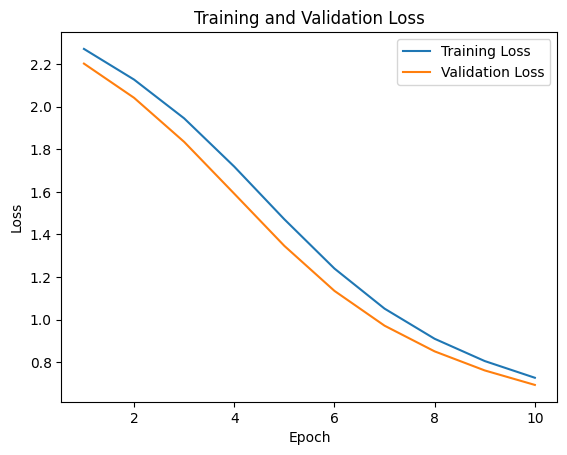

In [ ]:
# @title Sample solution (Try not to peek until you've given it a good try!')
params = batch_gradient_descent(cross_entropy_softmax_loss, initial_params, training_data, val_data, learning_rate=0.01, num_epochs=10, batch_size=1000)

#### Evaluating the model - <font color='blue'>`Beginner`</font>
usqu'a present nous n'avons vu qu'une seule methode pour evaluer notre model: la function cout.

Par contre, lors de l'evaluation d'un model de machien learning plusieur methodes peuvent etre utiliser.  Les hyper parametres sont selectionner en fuction du metric qu'on optimise. Voice quelques metrics que nous pouvons utilser pour nos taches de classifications.

*   **Accuracy**:  c'est le metric le plus important dans les taches de classifications. Il mesure la proportion des instances classifier correctment: $$ \text{Accuracy} = \frac{\text{Nombre des prediction correctes}}{\text{total nombres des predictions}}$$

* **Precision**: c'est la mesure des prediction positives, Par example si notre model model predit 100 points qui appartiennent a la classe 1, notre precision seras le pourcentage de ces 100 points qui appartient a la classe 1. Un plus grand precison es neccessery pour un diagnosis des images. Nous ne voulons pas faires des precision innutiles qui pourons engendre de traitement non neccessaire.

* **Recall**: Il s'agit d'une mesure de la capacité du modèle à identifier de manière efficiente toutes les instances positives. Par exemple, si l'ensemble de données comporte 100 points de données appartenant à la classe 1, combien sont effectivement classifiés comme appartenant à la classe 1 ? Le rappel revêt une importance primordiale dans les scénarios où l'omission d'une seule instance positive n'est pas souhaitée. Prenons l'exemple d'une entreprise de sécurité : nous ne souhaitons pas attribuer à tort la classification "sûr" à un signal émis par un utilisateur alors qu'il est en réalité en situation de danger.

**Let's use accuracy to evaluate the performance of our trained classifier.**

Tout d'abord, définissons une fonction de prédiction qui transforme la sortie du modèle en classe. Rappelons que la sortie du classificateur est composée de logit, correspondant à des probabilités non normalisées pour chaque classe. Ainsi, la classe prédite est celle avec la probabilité la plus élevée.
  

**Code Task**
  1. Implémentez une fonction appelée "model_predict" qui sélectionne la classe appropriée à partir de la sortie du modèle.

In [ ]:
# @title Your code here
def model_predict(params, X):
    """Use the model for predicition

      args:
        params: model parameters
        X: features array (num_samples, num_features)

      return
        pred: predicted class (num_samples, 1)
    """

    # call the model to compute the logits
    logits = model... # update me
    preds = ... # update me: hint use jnp.argmax

    return preds

In [ ]:
# @title Run to test your code
def test_model_predict():
    features = val_data[0][0:10]
    preds = model_predict(params, features)
    expected = jnp.argmax(model.apply(params, features), axis=-1)
    assert jnp.array_equal(preds, expected), "Failed! try again"
    print("Nice! Your answer looks correct.")

test_model_predict()

In [ ]:
# @title Solution model predict (Try not to peek until you've given it a good try!')
def model_predict(params, X):
    """Use the model for predicition

      args:
        params: model parameters
        X: features array (num_samples, num_features)

      return
        pred: predicted class (num_samples, 1)
    """

    # call the model to compute the logits
    logits = model.apply(params, X)
    preds = jnp.argmax(logits, axis=-1)

    return preds

In [ ]:
# @title Compute the accuray of your model
def compute_accuracy(data):
  """Compute the accuracy of the model"""

  X, y_true = data
  y_pred = model_predict(params, X).squeeze()

  acc = sum(y_pred==y_true)/len(y_true)

  return acc

train_acc = compute_accuracy(training_data)
val_acc = compute_accuracy(val_data)
print(f"The training accuracy is {train_acc} while the validation accuracy is {val_acc}")

The training accuracy is 0.8279464244842529 while the validation accuracy is 0.8304285407066345




Felicitatins, nous venons d'entrainer un model de machine learning pour la classification en utilisant le dataset populaire mnist digit.

**Excercise**:
- Etes vous satisfait de la precision de votre model?
- Que pouvez vous faire pour ameliorer la precision de votre model?



**Conclusions**
**Resume**

- L'apprentissage automatique est la science de l'utilisation des données pour construire des systèmes intelligents.
- L'apprentissage profond est le sous-ensemble des méthodes d'apprentissage automatique qui utilise des réseaux de neuronnes.
- L'optimisation est le processus de recherche des paramètres qui rendent la perte d'une fonction aussi petite que possible.
- JAX est un nouveau framework populaire qui peut être utilisé pour calculer les dérivées et former des modèles d'apprentissage automatique.

**Prochaines étapes:**
[Prochaines étapes pour les personnes qui ont terminé la pratique, comme la lecture facultative (par exemple, blogs, documents, cours, vidéos YouTube). Cela pourrait également être lié à d'autres pratiques.]

**Références:**


1. https://d2l.ai/chapter_linear-networks/linear-regression.html
2. https://jax.readthedocs.io/en/latest/notebooks/quickstart.html
3. https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/ai-vs-machine-learning-vs-deep-learning
4. https://www.javatpoint.com/machine-learning
5. Aurelien Genon, Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems, 2nd Edition, O'Reilly Media, 2019.

### Appendix

### Basis of JAX [OPTIONAL] - <font color='blue'>`Beginner`</font>

Throughout this tutorial, we will use the [JAX](https://jax.readthedocs.io/en/latest/) framework to illustrate the different concepts we will discuss. Jax is very similar to numpy but they are some important minor differences we need to be aware of.

Similarities between JAX and Numpy

In [ ]:
# Create NumPy arrays
np_array1 = np.array([1, 2, 3])
np_array2 = np.array([4, 5, 6])

# Create JAX arrays
jax_array1 = jnp.array([1, 2, 3])
jax_array2 = jnp.array([4, 5, 6])

# Element-wise addition using NumPy
np_result = np_array1 + np_array2
print("NumPy result:", np_result)

# Element-wise addition using JAX
jax_result = jax_array1 + jax_array2
print("JAX result:", jax_result)

In [ ]:
# Array concatenation using NumPy
np_array1 = np.array([1, 2, 3])
np_array2 = np.array([4, 5, 6])
np_concatenated = np.concatenate([np_array1, np_array2])

# Array concatenation using JAX
jax_array1 = jnp.array([1, 2, 3])
jax_array2 = jnp.array([4, 5, 6])
jax_concatenated = jnp.concatenate([jax_array1, jax_array2])

In [ ]:
# Element-wise functions using NumPy
np_array = np.array([0, np.pi/2, np.pi])
np_sin = np.sin(np_array)

# Element-wise functions using JAX
jax_array = jnp.array([0, jnp.pi/2, jnp.pi])
jax_sin = jnp.sin(jax_array)

In [ ]:
# Reduction operations using NumPy
np_array = np.array([1, 2, 3])
np_sum = np.sum(np_array)
np_mean = np.mean(np_array)

# Reduction operations using JAX
jax_array = jnp.array([1, 2, 3])
jax_sum = jnp.sum(jax_array)
jax_mean = jnp.mean(jax_array)

####JAX and NumPy - Differences ❌

Although JAX and NumPy have some similarities, they do have some important differences:
- Jax arrays are **immutable** (they can't be modified after they are created).
- The way they handle **randomness** -- JAX handles randomness explicitly.



#### JAX arrays are immutable, while NumPy arrays are not.

JAX and NumPy arrays are often interchangeable, **but** Jax arrays are **immutable** (they can't be modified after they are created). Allowing mutations makes transforms difficult and violates conditions for [pure functions](https://en.wikipedia.org/wiki/Pure_function).

Let's see this in practice by changing the number at the beginning of an array.

In [ ]:
# NumPy: mutable arrays
x = np.arange(10)
x[0] = 10
print(x)

Let's try this in JAX.

In [ ]:
# JAX: immutable arrays
# Should raise an error.
try:
    x = jnp.arange(10)
    x[0] = 10
except Exception as e:
    print("Exception {}".format(e))

So it fails! We can't mutate a JAX array once it has been created. To update JAX arrays, we need to use [helper functions](https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html) that return an updated copy of the JAX array.

Instead of doing this `x[idx] = y`, we need to do this `x = x.at[idx].set(y)`.

In [ ]:
x = jnp.arange(10)
new_x = x.at[0].set(10)
print(f" new_x: {new_x} original x: {x}")

Note here that `new_x` is a copy and that the original `x` is unchanged.

#### Randomness in NumPy vs JAX

JAX is more explicit in Pseudo Random Number Generation (PRNG) than NumPy and other libraries (such as TensorFlow or PyTorch). [PRNG](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) is the process of algorithmically generating a sequence of numbers, which *approximate* the properties of a sequence of random numbers.  

Let's see the differences in how JAX and NumPy generate random numbers.

##### In Numpy, PRNG is based on a global `state`.

Let's set the initial seed.

In [ ]:
# Set random seed
np.random.seed(42)
prng_state = np.random.get_state()

In [ ]:
# @title Helper function to compare prng keys (Run Cell)
def is_prng_state_the_same(prng_1, prng_2):
    """Helper function to compare two prng keys."""
    # concat all elements in prng tuple
    list_prng_data_equal = [(a == b) for a, b in zip(prng_1, prng_2)]
    # stack all elements together
    list_prng_data_equal = np.hstack(list_prng_data_equal)
    # check if all elements are the same
    is_prng_equal = all(list_prng_data_equal)
    return is_prng_equal

Let's take a few samples from a Gaussian (normal) Distribution and check if PRNG keys/global state change.

In [ ]:
print(
    f"sample 1 = {np.random.normal()} Did prng state change: {not is_prng_state_the_same(prng_state,np.random.get_state())}"
)
prng_state = np.random.get_state()
print(
    f"sample 2 = {np.random.normal()} Did prng state change: {not is_prng_state_the_same(prng_state,np.random.get_state())}"
)
prng_state = np.random.get_state()
print(
    f"sample 3 = {np.random.normal()} Did prng state change: {not is_prng_state_the_same(prng_state,np.random.get_state())}"
)

Numpy's global random state is updated every time a random number is generated, so *sample 1 != sample 2 != sample 3*.

Having the state automatically updated, makes it difficult to handle randomness in a **reproducible** way across different threads, processes and devices.

##### In JAX, PRNG is explicit.

In JAX, for each random number generation, you need to explicitly pass in a random key/state.

Passing the same state/key results in the same number being generated. This is generally undesirable.

In [ ]:
from jax import random

key = random.PRNGKey(42)
print(f"sample 1 = {random.normal(key)}")
print(f"sample 2 = {random.normal(key)}")
print(f"sample 3 = {random.normal(key)}")

To generate different and independent samples, you need to manually split the keys.

In [ ]:
from jax import random

key = random.PRNGKey(42)
print(f"sample 1 = {random.normal(key)}")

# We split the key -> new key and subkey
new_key, subkey = random.split(key)

# We use the subkey immediately and keep the new key for future splits.
# It doesn't really matter which key we keep and which one we use immediately.
print(f"sample 2 = {random.normal(subkey)}")

# We split the new key -> new key2 and subkey
new_key2, subkey = random.split(new_key)
print(f"sample 3 = {random.normal(subkey)}")

By using JAX, we can more easily reproduce random number generation in parallel across threads, processes, or even devices by explicitly passing and keeping track of the prng key (without relying on a global state that automatically gets updated).

### Derivation of partial derivatives for exercise 2 [OPTIONAL]
Derive $\frac{\partial \mathcal{L}}{\partial \mathbf{w}}$:
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{ \partial}{\partial \mathbf{w}} (\frac{1}{m} \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2) \quad \text{: Definition of $\mathcal{L}$} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{1}{m} \frac{ \partial }{\partial \mathbf{w}} ( \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2) \quad \text{: Constant multiple rule} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{1}{m} \sum_{i=1}^m \frac{ \partial }{\partial \mathbf{w}} (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2 \quad \text{: Sum Rule - derivative of sum is sum of derivatives.} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{1}{m} \sum_{i=1}^m 2 (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) \frac{ \partial }{\partial \mathbf{w}}(y_i -(\mathbf{w}^T \mathbf{x}_i + b))  \quad \text{: Power Rule + Chain Rule.} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{1}{m} \sum_{i=1}^m 2 (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) (-\mathbf{x}_i)  \quad \text{: Compute derative.} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{2}{m} \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) (-\mathbf{x}_i)  \quad \text{: Factor constant out of summation.} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{2}{m} \sum_{i=1}^m \mathbf{x}_i((\mathbf{w}^T \mathbf{x}_i + b) -y_i ) \quad \text{: Rearrange.} \\  
\end{aligned}

Derive $\frac{\partial \mathcal{L}}{\partial b}$:
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial b} & = \frac{ \partial}{\partial b} (\frac{1}{m} \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2) \quad \text{: Definition of $\mathcal{L}$} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{m} \frac{ \partial }{\partial b} ( \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2) \quad \text{: Constant multiple rule} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{m} \sum_{i=1}^m \frac{ \partial }{\partial b} (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2 \quad \text{: Sum Rule - derivative of sum is sum of derivatives.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{m} \sum_{i=1}^m 2 (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) \frac{ \partial }{\partial b}(y_i -(\mathbf{w}^T \mathbf{x}_i + b))  \quad \text{: Power Rule + Chain Rule.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{m} \sum_{i=1}^m 2 (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) (-1)  \quad \text{: Compute derative.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{2}{m} \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) (-1)  \quad \text{: Factor constant out of summation.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{2}{m} \sum_{i=1}^m ((\mathbf{w}^T \mathbf{x}_i + b) -y_i ) \quad \text{: Rearrange.} \\  
\end{aligned}

### Intuition for multi-class CE loss: exercise 3 [OPTIONAL]

For binary classifies we use the following formula for the cross entropy loss
 $$ -y_i \log(p_i) - (1-y_i) \log (1-p_i).$$

Recall in binary classier we have one class, so the output of our model is the probability, $p$ of belonging to that class. Instead, we can treat our binary classifier as two classes defined as follows
  - Class 1: Belonging to the class in question.
  - Class 2: Not belonging to the class.

Then if the probability for the data point $y$_i of belonging to Class 1 is $p$_i, this means its probability of not belonging to Class 1 which is equivalent to belonging to Class 2 is $(1-p_i)$. Anagoulsy since target values are one hot encoded for a multi-class classification if $y_i$ is the label that it indicates if the data point belongs to Class 1 or not the corresponding label for belonging to Class 2 will be $(1 - y_i)$. Hence we can rewrite our cross entropy loss in compact form as follows
$$ \sum_c -y^c_i \log(p^c_i).$$

**References:**

1. https://d2l.ai/chapter_linear-networks/linear-regression.html
2. https://jax.readthedocs.io/en/latest/notebooks/quickstart.html
3. https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/ai-vs-machine-learning-vs-deep-learning


For other practicals from the Deep Learning Indaba, please visit [here](https://github.com/deep-learning-indaba/indaba-pracs-2023).

## Feedback

Please provide feedback that we can use to improve our practicals in the future.

In [ ]:
# @title Generate Feedback Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/Cg9aoa7czoZCYqxF7",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

<img src="https://baobab.deeplearningindaba.com/static/media/indaba-logo-dark.d5a6196d.png" width="50%" />